In [74]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [75]:
path = untar_data(URLs.MNIST)

In [76]:
Path.BASE_PATH = path

In [77]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [78]:
(path/'training').ls(), (path/'testing').ls()

((#10) [Path('training/9'),Path('training/0'),Path('training/7'),Path('training/6'),Path('training/1'),Path('training/8'),Path('training/4'),Path('training/3'),Path('training/2'),Path('training/5')],
 (#10) [Path('testing/9'),Path('testing/0'),Path('testing/7'),Path('testing/6'),Path('testing/1'),Path('testing/8'),Path('testing/4'),Path('testing/3'),Path('testing/2'),Path('testing/5')])

In [79]:
# list with every list at each index
# numbers = []
# for i in range(10):
#    numbers.append((path/'training'/f"{i}").ls().sorted())

In [80]:
# with dict and list comprehensions, will look like:
# numbers = {training: [paths...], testing: [paths...]}
number_paths = {key: [(path/f"{key}"/f"{i}").ls().sorted() for i in range(10)] for key in ['training', 'testing']}

In [81]:
# look at random 4
im4_path = number_paths['training'][4][0]
im4 = Image.open(im4_path)
im4

In [82]:
# look at part of it closer
im4_t = tensor(im4)
df = pd.DataFrame(im4_t[6:19,0:28])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,207,252,148,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,252,252,252,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,84,253,252,252,168,0,0,0,0
3,0,0,0,0,0,0,0,63,62,0,0,0,0,0,0,0,0,0,99,252,253,252,153,0,0,0,0,0
4,0,0,0,0,0,0,32,237,237,72,0,0,0,0,0,0,0,0,181,252,253,189,10,0,0,0,0,0
5,0,0,0,0,0,0,140,252,252,158,0,0,0,0,0,0,0,53,232,252,253,76,0,0,0,0,0,0
6,0,0,0,0,0,0,181,252,252,35,0,0,0,0,0,0,0,73,252,252,191,15,0,0,0,0,0,0
7,0,0,0,0,0,135,253,253,206,20,0,0,0,0,0,0,0,218,253,253,0,0,0,0,0,0,0,0
8,0,0,0,0,94,247,252,252,174,73,73,73,42,0,0,0,94,247,252,252,0,0,0,0,0,0,0,0
9,0,0,0,0,129,252,252,252,252,252,252,252,222,181,181,181,212,252,252,231,0,0,0,0,0,0,0,0


In [83]:
# 3-liner
# numbers = {'training': [[] for _ in range(10)], 'testing': [[] for _ in range(10)]}
# for i in range(10):
#    numbers['training'][i] = [tensor(Image.open(path)) for path in number_paths['training'][i]]

In [87]:
# one-liner
tensors = {key: [[tensor(Image.open(path)) for path in number_paths[key][i]] for i in range(10)] for key in ['training', 'testing']}

In [88]:
len(tensors['training'][3]), len(tensors['training'][7]), len(tensors['training'][8])

(6131, 6265, 5851)

In [89]:
tensors['training'][7][0].shape # a seven

torch.Size([28, 28])

In [99]:
# stack them
stacked_tensors = {key: [torch.stack(tensors[key][i]).float()/255 for i in range(10)] for key in ['training', 'testing']}

In [100]:
stacked_tensors['training'][3].shape

torch.Size([6131, 28, 28])

In [102]:
len(stacked_tensors['training'][3].shape), stacked_tensors['training'][3].ndim

(3, 3)

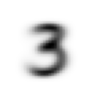

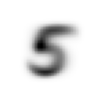

In [108]:
mean3 = stacked_tensors['training'][3].mean(0)
mean5 = stacked_tensors['training'][5].mean(0)
show_image(mean3), show_image(mean5);

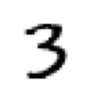

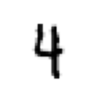

In [111]:
a_3 = stacked_tensors['training'][3][1]
a_4 = stacked_tensors['training'][4][1]
show_image(a_3), show_image(a_4);